# 텐서플로우(구글) - 산업용
- 이미지 관련 라이브러리
- keras를 이용해 코딩이 쉬움
- 순차적 sequentional, functional, class

# 파이토치(메타) - 연구용
- 자연어 관련 라이브러리
- 허깅페이스, 랭체인
- class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data = data[['Survived', 'Pclass','Sex', 'Age','SibSp','Parch','Embarked']]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
data['Family'] = data['SibSp'] + data['Parch']
data.head()

/tmp/ipykernel_45780/748254172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Family'] = data['SibSp'] + data['Parch']


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [7]:
data = data.drop(['SibSp', 'Parch'], axis = 1)
data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [9]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   Family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [10]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Survived,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,True,False,True
1,1,1,38.0,1,False,False,False
2,1,3,26.0,0,False,False,True
3,1,1,35.0,1,False,False,True
4,0,3,35.0,0,True,False,True


In [11]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.059160,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.059160,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.560975,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.059160,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.560975,0.737695,-0.307562,0.615838
...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.560975,0.737695,-0.307562,0.615838
887,-1.566107,-0.823344,-0.560975,-1.355574,-0.307562,0.615838
888,0.827377,0.000000,1.299429,-1.355574,-0.307562,0.615838
889,-1.566107,-0.284663,-0.560975,0.737695,-0.307562,-1.623803


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.7, random_state = 7)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [19]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       384
           1       0.75      0.67      0.71       240

    accuracy                           0.79       624
   macro avg       0.78      0.77      0.77       624
weighted avg       0.78      0.79      0.78       624



In [20]:
# for i in range(1, 10) : 
#     dtc = DecisionTreeClassifier(max_depth = i, random_state = 7)
#     dtc.fit(X_train, y_train)
#     pred = dtc.predict(X_test)
#     print(i, classification_report(y_test, pred))

1               precision    recall  f1-score   support

           0       0.80      0.85      0.83       384
           1       0.73      0.67      0.70       240

    accuracy                           0.78       624
   macro avg       0.77      0.76      0.76       624
weighted avg       0.78      0.78      0.78       624

2               precision    recall  f1-score   support

           0       0.80      0.88      0.84       384
           1       0.78      0.65      0.71       240

    accuracy                           0.79       624
   macro avg       0.79      0.77      0.78       624
weighted avg       0.79      0.79      0.79       624

3               precision    recall  f1-score   support

           0       0.81      0.86      0.83       384
           1       0.75      0.67      0.71       240

    accuracy                           0.79       624
   macro avg       0.78      0.77      0.77       624
weighted avg       0.78      0.79      0.78       624

4            

# tensorflow sequential API를 사용한 순차적 모델

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 딥러닝 신경망 모델 정의

In [22]:
X_train.shape[1]

6

In [23]:
# 이게 신경망 모델 정의한 거
model = Sequential()
model.add(Dense(32, input_dim = X_train.shape[1], activation = 'relu')) # 입력층, input_dim은 독립변수의 컬럼 수
model.add(Dense(64, activation = 'relu')) # 은닉층 1
model.add(Dense(32, activation = 'relu')) # 은닉층 2
model.add(Dense(16, activation = 'relu')) # 은닉층 3
model.add(Dense(1, activation = 'sigmoid')) # 출력층, 이진분류이기 때문에 activation을 sigmoid로

2024-09-09 12:40:08.708291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 12:40:08.709984: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-09 12:40:09.047794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 12:40:09.047842: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 12:40:09.047863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

## 모델 파라미터 세팅
- model.compile()로 함
- loss는 오차 계산 지표
    - 이진분류일 경우 binary_crossentropy를 사용
    - 다중분류일 경우 categorical_crossentropy를 사용
    - 데이터에 0이 많은 희소행렬인 경우엔 sparse_categorical_crossentropy를 사용
    - 연속형 데이터일 경우엔 mse
- optimizer는 머신러닝에서의 learning_rate
    - adam 을 가장 많이 사용

In [24]:
# 역전파를 할 때 원본과 계산해서 오차의 기준을 정함.
# binary_crossentropy로 기준을 정해라 = 이진분류일 경우
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
- epochs : 전체 데이터를 한 번 훈련하는 주기
- batch_size : 전체 데이터를 쪼개서 훈련하는 것. 메모리에 맞춰서 크기를 조절해야 하기 때문(메모리는 컴퓨터 메모리임)
- validation_data : 검증 데이터로 모델 검증 실시

In [25]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 40, validation_data = (X_test, y_test))

Epoch 1/200


2024-09-09 14:14:42.780512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:14:42.861463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:14:42.861528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 1s 46ms/step - loss: 0.6630 - accuracy: 0.6255 - val_loss: 0.6481 - val_accuracy: 0.6554
Epoch 2/200
5/7 [====================>.........] - ETA: 0s - loss: 0.6338 - accuracy: 0.6700

2024-09-09 14:14:43.361856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:14:43.389614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:14:43.389695: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 0s 26ms/step - loss: 0.6254 - accuracy: 0.6854 - val_loss: 0.6180 - val_accuracy: 0.7019
Epoch 3/200
7/7 [==============================] - 0s 24ms/step - loss: 0.5927 - accuracy: 0.7266 - val_loss: 0.5885 - val_accuracy: 0.7500
Epoch 4/200
7/7 [==============================] - 0s 24ms/step - loss: 0.5573 - accuracy: 0.7678 - val_loss: 0.5628 - val_accuracy: 0.7692
Epoch 5/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5252 - accuracy: 0.7828 - val_loss: 0.5382 - val_accuracy: 0.7724
Epoch 6/200
7/7 [==============================] - 0s 22ms/step - loss: 0.4960 - accuracy: 0.8090 - val_loss: 0.5180 - val_accuracy: 0.7516
Epoch 7/200
7/7 [==============================] - 0s 23ms/step - loss: 0.4648 - accuracy: 0.8202 - val_loss: 0.4997 - val_accuracy: 0.7516
Epoch 8/200
7/7 [==============================] - 0s 23ms/step - loss: 0.4431 - accuracy: 0.8090 - val_loss: 0.4843 - val_accuracy: 0.7580
Epoch 9/200
7/7 [===============

7/7 [==============================] - 0s 23ms/step - loss: 0.2720 - accuracy: 0.8914 - val_loss: 0.5297 - val_accuracy: 0.7756
Epoch 61/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2676 - accuracy: 0.8951 - val_loss: 0.5214 - val_accuracy: 0.7821
Epoch 62/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2653 - accuracy: 0.8951 - val_loss: 0.5318 - val_accuracy: 0.7692
Epoch 63/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2657 - accuracy: 0.8951 - val_loss: 0.5290 - val_accuracy: 0.7708
Epoch 64/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2634 - accuracy: 0.8951 - val_loss: 0.5283 - val_accuracy: 0.7740
Epoch 65/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2621 - accuracy: 0.8914 - val_loss: 0.5495 - val_accuracy: 0.7692
Epoch 66/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2614 - accuracy: 0.8951 - val_loss: 0.5440 - val_accuracy: 0.7756
Epoch 67/200
7/7 [========

7/7 [==============================] - 0s 24ms/step - loss: 0.2216 - accuracy: 0.9064 - val_loss: 0.7000 - val_accuracy: 0.7532
Epoch 119/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2235 - accuracy: 0.9064 - val_loss: 0.7337 - val_accuracy: 0.7580
Epoch 120/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2163 - accuracy: 0.9064 - val_loss: 0.6907 - val_accuracy: 0.7740
Epoch 121/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2245 - accuracy: 0.9101 - val_loss: 0.6936 - val_accuracy: 0.7580
Epoch 122/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2185 - accuracy: 0.9026 - val_loss: 0.7311 - val_accuracy: 0.7532
Epoch 123/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2186 - accuracy: 0.9064 - val_loss: 0.7310 - val_accuracy: 0.7580
Epoch 124/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2160 - accuracy: 0.9064 - val_loss: 0.7283 - val_accuracy: 0.7596
Epoch 125/200
7/7 [=

Epoch 176/200
7/7 [==============================] - 0s 22ms/step - loss: 0.1976 - accuracy: 0.9139 - val_loss: 0.9293 - val_accuracy: 0.7596
Epoch 177/200
7/7 [==============================] - 0s 22ms/step - loss: 0.1992 - accuracy: 0.9176 - val_loss: 0.8924 - val_accuracy: 0.7532
Epoch 178/200
7/7 [==============================] - 0s 23ms/step - loss: 0.1995 - accuracy: 0.9101 - val_loss: 0.9214 - val_accuracy: 0.7580
Epoch 179/200
7/7 [==============================] - 0s 22ms/step - loss: 0.1997 - accuracy: 0.9139 - val_loss: 0.9294 - val_accuracy: 0.7580
Epoch 180/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2038 - accuracy: 0.9139 - val_loss: 0.9687 - val_accuracy: 0.7612
Epoch 181/200
7/7 [==============================] - 0s 24ms/step - loss: 0.1924 - accuracy: 0.9213 - val_loss: 0.8915 - val_accuracy: 0.7564
Epoch 182/200
7/7 [==============================] - 0s 24ms/step - loss: 0.1970 - accuracy: 0.9139 - val_loss: 0.9498 - val_accuracy: 0.7532
Epoch 

In [29]:
history.history

{'loss': [0.6630275249481201,
  0.6254191398620605,
  0.5927056074142456,
  0.5572603940963745,
  0.5252330899238586,
  0.49601495265960693,
  0.46475285291671753,
  0.44308531284332275,
  0.418834388256073,
  0.4015694856643677,
  0.3898657262325287,
  0.37840715050697327,
  0.3732829988002777,
  0.36697232723236084,
  0.36125513911247253,
  0.3570226728916168,
  0.35376283526420593,
  0.34999987483024597,
  0.34739965200424194,
  0.3449017405509949,
  0.34080442786216736,
  0.3377106487751007,
  0.3364979326725006,
  0.33319994807243347,
  0.33090677857398987,
  0.3289901912212372,
  0.32568347454071045,
  0.32462137937545776,
  0.3224892318248749,
  0.32108020782470703,
  0.3177363872528076,
  0.3162473738193512,
  0.31315070390701294,
  0.3118153512477875,
  0.3086513578891754,
  0.3106720745563507,
  0.30701664090156555,
  0.3082844913005829,
  0.30505913496017456,
  0.3013659119606018,
  0.2965761423110962,
  0.29510053992271423,
  0.2951701879501343,
  0.29350751638412476,
  0.2

# 딥러닝 모델 성능 평가
- 딥러닝에서 모델 성능을 평가하는 지표는 loss
- loss가 낮으면 accuracy가 올라가지만, 비례하지 않을 때도 있음
- 두 지표 간 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [31]:
score = model.evaluate(X_test, y_test)
print('test loss : ', score[0])
print('test accuracy : ', score[1])

20/20 [==============================] - 0s 6ms/step - loss: 1.0140 - accuracy: 0.7628
test loss :  1.013959288597107
test accuracy :  0.7628205418586731


## 딥러닝 결과 시각화

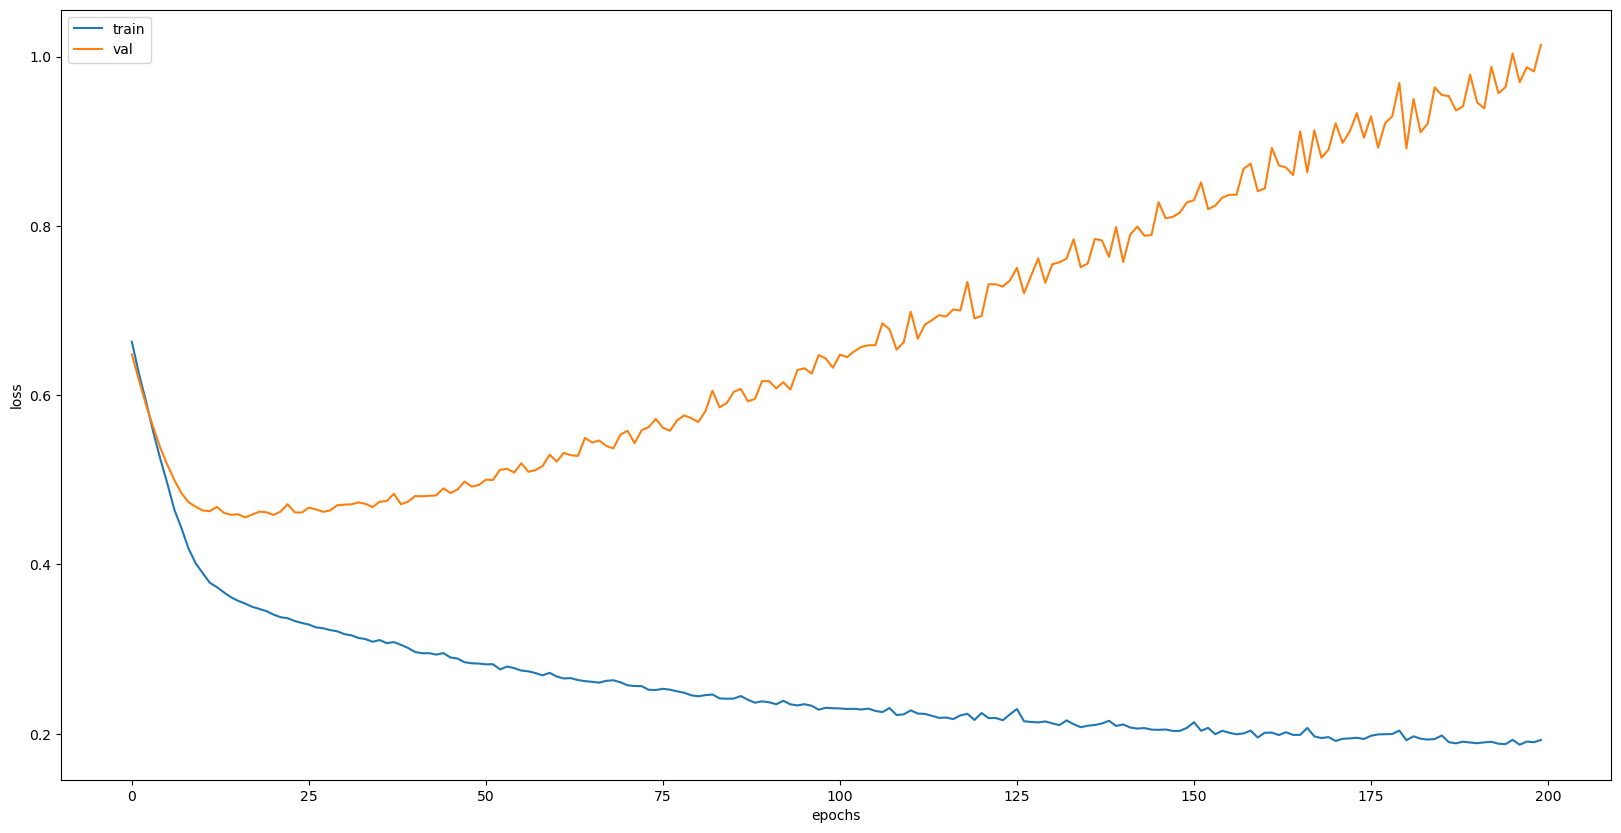

In [33]:
plt.figure(figsize = (20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [34]:
# 예측결과는 실수가 나와 정수로 바꿔줘야 할 필요가 있음.
pred = model.predict(X_test)
pred

20/20 [==============================] - 0s 3ms/step


2024-09-09 14:38:51.073958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:38:51.149298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:38:51.149362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 14:38:51.162406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:38:51.162468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

array([[3.94822136e-02],
       [3.55964229e-02],
       [3.50772649e-01],
       [2.74105987e-05],
       [9.99996185e-01],
       [9.98887718e-01],
       [1.04922701e-05],
       [2.05028653e-01],
       [9.28775221e-03],
       [9.99940872e-01],
       [9.92618620e-01],
       [5.54041665e-12],
       [9.87008989e-01],
       [9.99575436e-01],
       [1.76743239e-01],
       [1.03673447e-05],
       [9.86130297e-01],
       [2.48535592e-02],
       [7.05345228e-05],
       [2.34711380e-03],
       [7.75772929e-01],
       [5.50971366e-02],
       [1.85708504e-05],
       [9.99998689e-01],
       [5.55279613e-01],
       [9.99227762e-01],
       [9.76321161e-01],
       [1.67969652e-02],
       [5.48245385e-02],
       [9.99984741e-01],
       [9.96743619e-01],
       [9.95009422e-01],
       [1.03673447e-05],
       [1.48733994e-02],
       [1.77149981e-01],
       [2.76449591e-01],
       [6.01348653e-03],
       [1.64711669e-01],
       [1.82682414e-09],
       [8.74391117e-04],


In [35]:
pred = pd.DataFrame(pred)
pred

,0
0,0.039482
1,0.035596
2,0.350773
3,0.000027
4,0.999996
...,...
619,0.654515
620,0.997226
621,0.083621
622,0.619897


In [38]:
pred = pred[0].apply(lambda x : 1 if x >= 0.5 else 0)
pred

0      0
1      0
2      0
3      0
4      1
      ..
619    1
620    1
621    0
622    1
623    0
Name: 0, Length: 624, dtype: int64

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       384
           1       0.67      0.75      0.71       240

    accuracy                           0.76       624
   macro avg       0.75      0.76      0.75       624
weighted avg       0.77      0.76      0.76       624



# TensorFlow Functional API를 이용한 함수형 모델
- sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에 한계가 있음
- functional API는 입력층과 출력층을 사용자가 직접 정의 가능
- 다중입력(multi-input), 다중출력(multi-output)등 복잡한 모델을 정의할 수 있음
- input(shape = (독립변수 수))로 입력층 정의
- 이전 층을 다음 층의 입력으로 사용
- model()에 입력과 출력을 정의


In [40]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [41]:
# 모델 정의
inputs = Input(shape = (X_train.shape[1], )) # 입력층 정의 input(shape=(독립변수 수, ))
x = Dense(32, activation = 'relu')(inputs) # 은닉층 1번
x = Dense(64, activation = 'relu')(x) # 은닉층 2번
x = Dense(32, activation = 'relu')(x) # 은닉층 3번
x = Dense(16, activation = 'relu')(x) # 은닉층 4번
x = Dense(1, activation = 'sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                224       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable par

In [45]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 400, batch_size = 100, validation_data = (X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

Epoch 1/400
1/3 [=========>....................] - ETA: 0s - loss: 0.1669 - accuracy: 0.9400

2024-09-09 15:24:10.287408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:24:10.355355: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:24:10.355422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 92ms/step - loss: 0.1825 - accuracy: 0.9326 - val_loss: 1.3698 - val_accuracy: 0.7804
Epoch 2/400
3/3 [==============================] - 0s 39ms/step - loss: 0.1863 - accuracy: 0.9251 - val_loss: 1.3793 - val_accuracy: 0.7724
Epoch 3/400
1/3 [=========>....................] - ETA: 0s - loss: 0.1032 - accuracy: 0.9500

2024-09-09 15:24:10.496067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:24:10.524708: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:24:10.524777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 44ms/step - loss: 0.1604 - accuracy: 0.9326 - val_loss: 1.4192 - val_accuracy: 0.7596
Epoch 4/400
3/3 [==============================] - 0s 38ms/step - loss: 0.1618 - accuracy: 0.9363 - val_loss: 1.4320 - val_accuracy: 0.7580
Epoch 5/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1658 - accuracy: 0.9288 - val_loss: 1.3872 - val_accuracy: 0.7724
Epoch 6/400
3/3 [==============================] - 0s 39ms/step - loss: 0.1578 - accuracy: 0.9363 - val_loss: 1.3698 - val_accuracy: 0.7724
Epoch 7/400
3/3 [==============================] - 0s 38ms/step - loss: 0.1638 - accuracy: 0.9288 - val_loss: 1.3765 - val_accuracy: 0.7724
Epoch 8/400
3/3 [==============================] - 0s 45ms/step - loss: 0.1562 - accuracy: 0.9401 - val_loss: 1.3813 - val_accuracy: 0.7708
Epoch 9/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1553 - accuracy: 0.9401 - val_loss: 1.3784 - val_accuracy: 0.7708
Epoch 10/400
3/3 [==============

3/3 [==============================] - 0s 38ms/step - loss: 0.1476 - accuracy: 0.9476 - val_loss: 1.5532 - val_accuracy: 0.7676
Epoch 62/400
3/3 [==============================] - 0s 38ms/step - loss: 0.1498 - accuracy: 0.9438 - val_loss: 1.5533 - val_accuracy: 0.7740
Epoch 63/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1489 - accuracy: 0.9438 - val_loss: 1.5413 - val_accuracy: 0.7772
Epoch 64/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1490 - accuracy: 0.9438 - val_loss: 1.5259 - val_accuracy: 0.7724
Epoch 65/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1476 - accuracy: 0.9438 - val_loss: 1.5342 - val_accuracy: 0.7756
Epoch 66/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1474 - accuracy: 0.9401 - val_loss: 1.5509 - val_accuracy: 0.7676
Epoch 67/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1475 - accuracy: 0.9438 - val_loss: 1.5616 - val_accuracy: 0.7676
Epoch 68/400
3/3 [========

3/3 [==============================] - 0s 37ms/step - loss: 0.1414 - accuracy: 0.9401 - val_loss: 1.6902 - val_accuracy: 0.7692
Epoch 120/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1424 - accuracy: 0.9438 - val_loss: 1.7004 - val_accuracy: 0.7724
Epoch 121/400
3/3 [==============================] - 0s 38ms/step - loss: 0.1400 - accuracy: 0.9438 - val_loss: 1.7185 - val_accuracy: 0.7708
Epoch 122/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1427 - accuracy: 0.9476 - val_loss: 1.7096 - val_accuracy: 0.7628
Epoch 123/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1396 - accuracy: 0.9476 - val_loss: 1.6990 - val_accuracy: 0.7724
Epoch 124/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1439 - accuracy: 0.9401 - val_loss: 1.7042 - val_accuracy: 0.7724
Epoch 125/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1414 - accuracy: 0.9476 - val_loss: 1.7287 - val_accuracy: 0.7548
Epoch 126/400
3/3 [=

Epoch 177/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1348 - accuracy: 0.9476 - val_loss: 1.8761 - val_accuracy: 0.7692
Epoch 178/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1356 - accuracy: 0.9551 - val_loss: 1.8526 - val_accuracy: 0.7628
Epoch 179/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1367 - accuracy: 0.9476 - val_loss: 1.8342 - val_accuracy: 0.7596
Epoch 180/400
3/3 [==============================] - 0s 42ms/step - loss: 0.1350 - accuracy: 0.9476 - val_loss: 1.8377 - val_accuracy: 0.7692
Epoch 181/400
3/3 [==============================] - 0s 39ms/step - loss: 0.1328 - accuracy: 0.9551 - val_loss: 1.8597 - val_accuracy: 0.7740
Epoch 182/400
3/3 [==============================] - 0s 40ms/step - loss: 0.1356 - accuracy: 0.9513 - val_loss: 1.8826 - val_accuracy: 0.7724
Epoch 183/400
3/3 [==============================] - 0s 39ms/step - loss: 0.1380 - accuracy: 0.9513 - val_loss: 1.8960 - val_accuracy: 0.7692
Epoch 

Epoch 235/400
3/3 [==============================] - 0s 42ms/step - loss: 0.1347 - accuracy: 0.9476 - val_loss: 2.0136 - val_accuracy: 0.7644
Epoch 236/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1285 - accuracy: 0.9513 - val_loss: 2.0367 - val_accuracy: 0.7596
Epoch 237/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1306 - accuracy: 0.9476 - val_loss: 2.0406 - val_accuracy: 0.7676
Epoch 238/400
3/3 [==============================] - 0s 46ms/step - loss: 0.1284 - accuracy: 0.9551 - val_loss: 2.0344 - val_accuracy: 0.7692
Epoch 239/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1373 - accuracy: 0.9401 - val_loss: 2.0278 - val_accuracy: 0.7676
Epoch 240/400
3/3 [==============================] - 0s 42ms/step - loss: 0.1306 - accuracy: 0.9476 - val_loss: 2.0391 - val_accuracy: 0.7548
Epoch 241/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1328 - accuracy: 0.9513 - val_loss: 2.0309 - val_accuracy: 0.7724
Epoch 

Epoch 293/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1242 - accuracy: 0.9551 - val_loss: 2.1433 - val_accuracy: 0.7708
Epoch 294/400
3/3 [==============================] - 0s 33ms/step - loss: 0.1235 - accuracy: 0.9551 - val_loss: 2.1549 - val_accuracy: 0.7708
Epoch 295/400
3/3 [==============================] - 0s 41ms/step - loss: 0.1268 - accuracy: 0.9551 - val_loss: 2.1552 - val_accuracy: 0.7708
Epoch 296/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1258 - accuracy: 0.9588 - val_loss: 2.1515 - val_accuracy: 0.7676
Epoch 297/400
3/3 [==============================] - 0s 35ms/step - loss: 0.1309 - accuracy: 0.9438 - val_loss: 2.1520 - val_accuracy: 0.7564
Epoch 298/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1276 - accuracy: 0.9513 - val_loss: 2.1518 - val_accuracy: 0.7628
Epoch 299/400
3/3 [==============================] - 0s 53ms/step - loss: 0.1252 - accuracy: 0.9551 - val_loss: 2.1710 - val_accuracy: 0.7708
Epoch 

Epoch 351/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1205 - accuracy: 0.9513 - val_loss: 2.2966 - val_accuracy: 0.7628
Epoch 352/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1199 - accuracy: 0.9513 - val_loss: 2.2996 - val_accuracy: 0.7692
Epoch 353/400
3/3 [==============================] - 0s 34ms/step - loss: 0.1186 - accuracy: 0.9476 - val_loss: 2.2995 - val_accuracy: 0.7708
Epoch 354/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1206 - accuracy: 0.9513 - val_loss: 2.3145 - val_accuracy: 0.7708
Epoch 355/400
3/3 [==============================] - 0s 36ms/step - loss: 0.1184 - accuracy: 0.9513 - val_loss: 2.3206 - val_accuracy: 0.7660
Epoch 356/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1161 - accuracy: 0.9551 - val_loss: 2.3061 - val_accuracy: 0.7708
Epoch 357/400
3/3 [==============================] - 0s 32ms/step - loss: 0.1176 - accuracy: 0.9551 - val_loss: 2.3085 - val_accuracy: 0.7708
Epoch 

2024-09-09 15:24:46.877809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


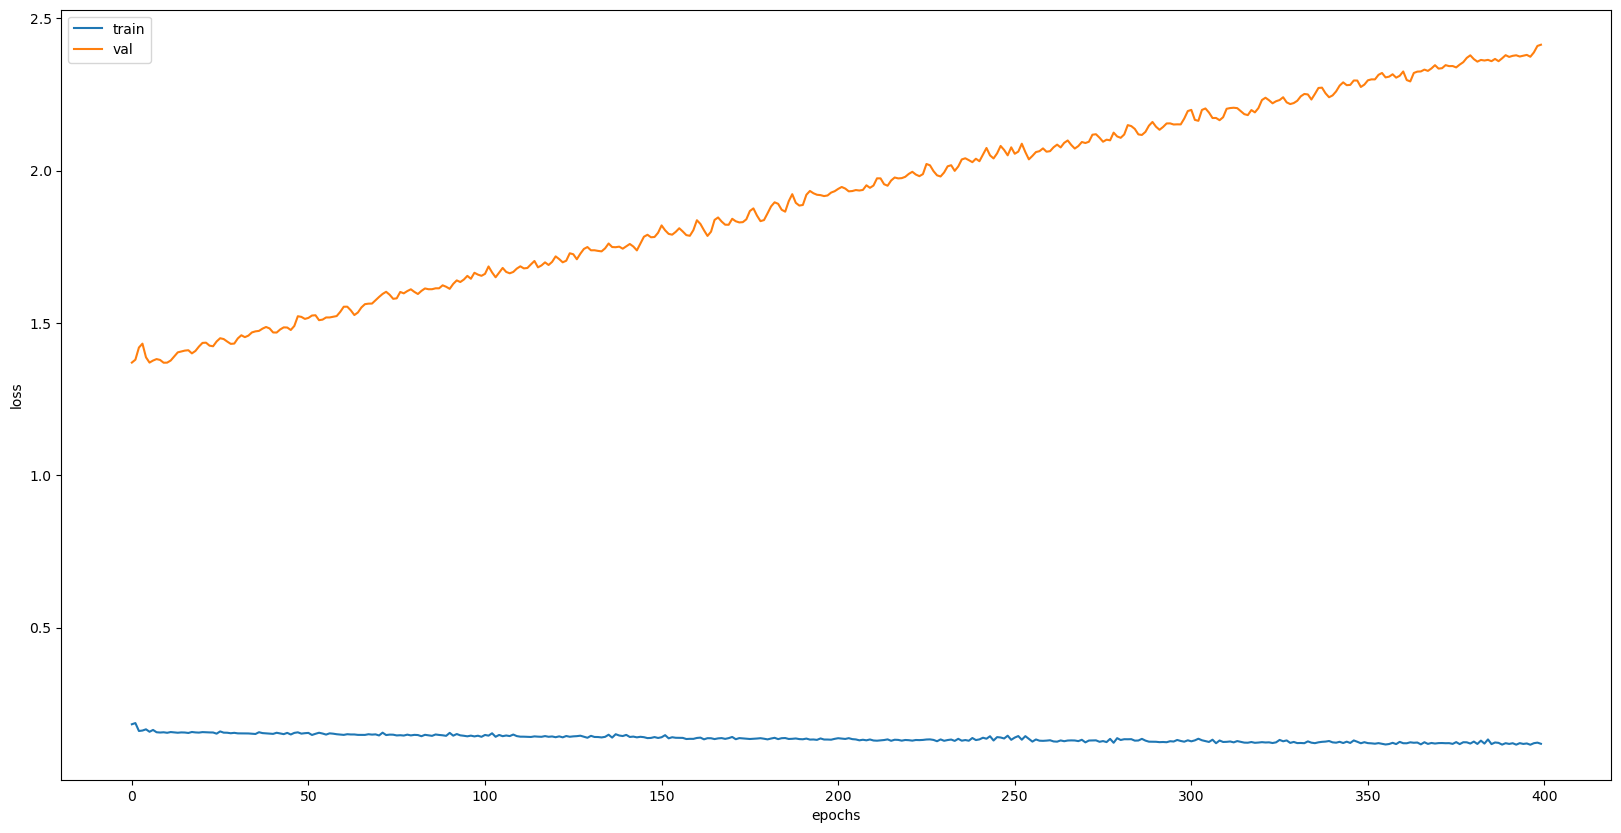

In [46]:
plt.figure(figsize = (20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# model subclassing API로 모델 만들기
- class 형태의 모델 정의 방법
- tf.keras.model을 상속받아 작성

In [53]:
class Titanic(tf.keras.Model) :
    def __init__(self) : 
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(64, activation = 'relu')
        self.dense3 = tf.keras.layers.Dense(16, activation = 'relu')
        self.classifier = tf.keras.layers.Dense(1, activation = 'sigmoid')
        
    def call(self, inputs) :
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [54]:
model = Titanic()

In [55]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size = 500, validation_data = (X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

Epoch 1/200


2024-09-09 15:55:02.436361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:55:02.498660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:55:02.498733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 798ms/step - loss: 0.7160 - accuracy: 0.5019 - val_loss: 0.6979 - val_accuracy: 0.5705
Epoch 2/200
1/1 [==============================] - 0s 48ms/step - loss: 0.7050 - accuracy: 0.5730 - val_loss: 0.6892 - val_accuracy: 0.5817
Epoch 3/200
1/1 [==============================] - 0s 62ms/step - loss: 0.6946 - accuracy: 0.5693 - val_loss: 0.6809 - val_accuracy: 0.5865
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.5693

2024-09-09 15:55:02.852166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:55:02.883082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:55:02.883165: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14853 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 57ms/step - loss: 0.6846 - accuracy: 0.5693 - val_loss: 0.6730 - val_accuracy: 0.5897
Epoch 5/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6752 - accuracy: 0.5693 - val_loss: 0.6654 - val_accuracy: 0.6074
Epoch 6/200
1/1 [==============================] - 0s 52ms/step - loss: 0.6659 - accuracy: 0.6067 - val_loss: 0.6582 - val_accuracy: 0.6090
Epoch 7/200
1/1 [==============================] - 0s 57ms/step - loss: 0.6569 - accuracy: 0.6142 - val_loss: 0.6515 - val_accuracy: 0.6234
Epoch 8/200
1/1 [==============================] - 0s 82ms/step - loss: 0.6487 - accuracy: 0.6330 - val_loss: 0.6450 - val_accuracy: 0.6362
Epoch 9/200
1/1 [==============================] - 0s 54ms/step - loss: 0.6407 - accuracy: 0.6330 - val_loss: 0.6389 - val_accuracy: 0.6378
Epoch 10/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6329 - accuracy: 0.6330 - val_loss: 0.6330 - val_accuracy: 0.6458
Epoch 11/200
1/1 [=============

1/1 [==============================] - 0s 56ms/step - loss: 0.3855 - accuracy: 0.8427 - val_loss: 0.4724 - val_accuracy: 0.8013
Epoch 63/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3835 - accuracy: 0.8427 - val_loss: 0.4719 - val_accuracy: 0.8013
Epoch 64/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3815 - accuracy: 0.8427 - val_loss: 0.4715 - val_accuracy: 0.7997
Epoch 65/200
1/1 [==============================] - 0s 53ms/step - loss: 0.3796 - accuracy: 0.8390 - val_loss: 0.4710 - val_accuracy: 0.7997
Epoch 66/200
1/1 [==============================] - 0s 55ms/step - loss: 0.3778 - accuracy: 0.8390 - val_loss: 0.4706 - val_accuracy: 0.7997
Epoch 67/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3761 - accuracy: 0.8390 - val_loss: 0.4702 - val_accuracy: 0.7981
Epoch 68/200
1/1 [==============================] - 0s 65ms/step - loss: 0.3744 - accuracy: 0.8390 - val_loss: 0.4698 - val_accuracy: 0.7981
Epoch 69/200
1/1 [========

1/1 [==============================] - 0s 52ms/step - loss: 0.3245 - accuracy: 0.8577 - val_loss: 0.4694 - val_accuracy: 0.7869
Epoch 121/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3239 - accuracy: 0.8577 - val_loss: 0.4695 - val_accuracy: 0.7837
Epoch 122/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3233 - accuracy: 0.8577 - val_loss: 0.4696 - val_accuracy: 0.7837
Epoch 123/200
1/1 [==============================] - 0s 54ms/step - loss: 0.3227 - accuracy: 0.8577 - val_loss: 0.4697 - val_accuracy: 0.7837
Epoch 124/200
1/1 [==============================] - 0s 55ms/step - loss: 0.3221 - accuracy: 0.8577 - val_loss: 0.4699 - val_accuracy: 0.7837
Epoch 125/200
1/1 [==============================] - 0s 69ms/step - loss: 0.3215 - accuracy: 0.8577 - val_loss: 0.4701 - val_accuracy: 0.7837
Epoch 126/200
1/1 [==============================] - 0s 47ms/step - loss: 0.3209 - accuracy: 0.8577 - val_loss: 0.4703 - val_accuracy: 0.7837
Epoch 127/200
1/1 [=

Epoch 178/200
1/1 [==============================] - 0s 53ms/step - loss: 0.2926 - accuracy: 0.8727 - val_loss: 0.4857 - val_accuracy: 0.7901
Epoch 179/200
1/1 [==============================] - 0s 56ms/step - loss: 0.2920 - accuracy: 0.8727 - val_loss: 0.4861 - val_accuracy: 0.7901
Epoch 180/200
1/1 [==============================] - 0s 50ms/step - loss: 0.2915 - accuracy: 0.8764 - val_loss: 0.4864 - val_accuracy: 0.7917
Epoch 181/200
1/1 [==============================] - 0s 59ms/step - loss: 0.2909 - accuracy: 0.8764 - val_loss: 0.4868 - val_accuracy: 0.7933
Epoch 182/200
1/1 [==============================] - 0s 55ms/step - loss: 0.2903 - accuracy: 0.8764 - val_loss: 0.4872 - val_accuracy: 0.7933
Epoch 183/200
1/1 [==============================] - 0s 46ms/step - loss: 0.2898 - accuracy: 0.8764 - val_loss: 0.4875 - val_accuracy: 0.7933
Epoch 184/200
1/1 [==============================] - 0s 47ms/step - loss: 0.2893 - accuracy: 0.8764 - val_loss: 0.4878 - val_accuracy: 0.7933
Epoch 

2024-09-09 15:55:14.494940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


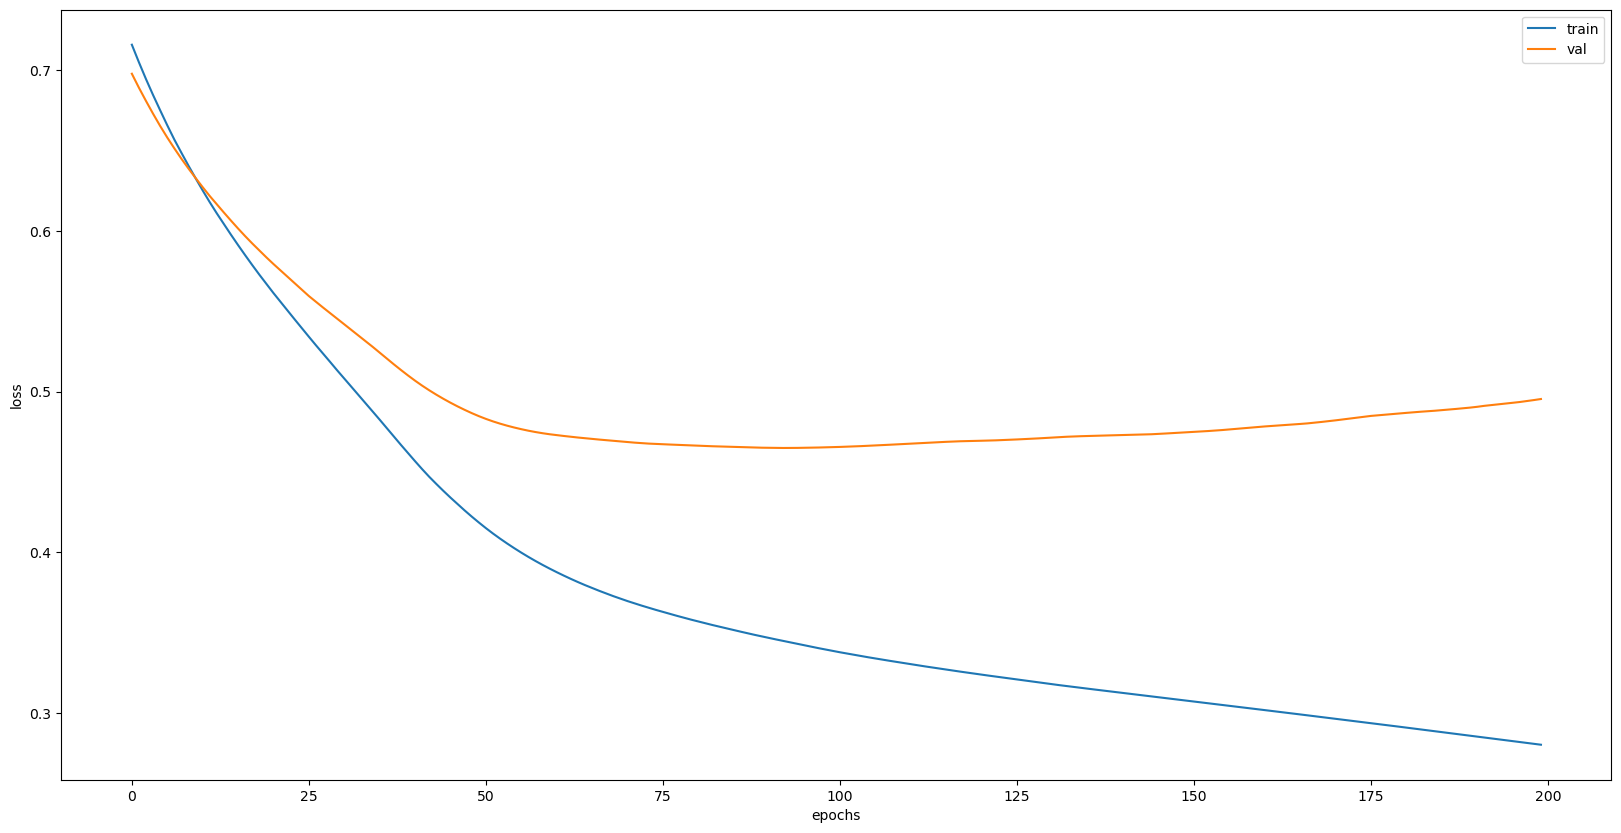

In [56]:
plt.figure(figsize = (20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()